# Cardiovascular Disease dataset

* Objetivos: criar uma ferramenta que aumente a precisão do diagnóstico e que essa precisão seja estável para todos os diagnósticos.


* Enviar um relatório para o CEO da Cardio Catch Diseases, reportando os resultados e respondendo às seguintes perguntas:
    * Qual a Acurácia e a Precisão da ferramenta?
    * Quanto lucro a Cardio Catch Diseases passará a ter com a nova ferramenta?
    * Qual a Confiabilidade do resultado dados pela nova ferramenta?
    
    
* Primeiramente, esses dados serão limpos e explorados, para que possa haver uma melhor compreensão do dataset. Em seguida, serão aplicadas as ferramentas de machine learning.


* Fonte: https://www.kaggle.com/sulianova/cardiovascular-disease-dataset

## Importando bibliotecas e abrindo o dataset

In [1]:
#Importando bibliotcas
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib as mat
import matplotlib.pyplot as plt
import warnings
%matplotlib inline

In [2]:
#Abrindo o dataset
df = pd.read_csv('cardio_train.csv', sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
#Definindo a coluna 'id' como índice
df.set_index('id', inplace=True)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
#Algumas transformações serão necessárias para facilitar a visualização dos dados
df['age'] //= 356  # Converte a idade de dias para ano
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,51,2,168,62.0,110,80,1,1,0,0,1,0
1,56,1,156,85.0,140,90,3,1,0,0,1,1
2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,49,2,169,82.0,150,100,1,1,0,0,1,1
4,49,1,156,56.0,100,60,1,1,0,0,0,0


### Descrição dos dados

* Existem 3 tipos de recursos de entrada:


* Objetivo: informações factuais;
* Exame: resultados de exames médicos;
* Subjetivo: informações fornecidas pelo paciente.


* Features:

* Age | Objective Feature | age | int (years)
* Height | Objective Feature | height | int (cm) |
* Weight | Objective Feature | weight | float (kg) |
* Gender | Objective Feature | gender | categorical code |
* Systolic blood pressure | Examination Feature | ap_hi | int |
* Diastolic blood pressure | Examination Feature | ap_lo | int |
* Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
* Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
* Smoking | Subjective Feature | smoke | binary |
* Alcohol intake | Subjective Feature | alco | binary |
* Physical activity | Subjective Feature | active | binary |
* Presence or absence of cardiovascular disease | Target Variable | cardio | binary |


* All of the dataset values were collected at the moment of medical examination.

## Exploração de dados

#### Resumo sobre o dataset

In [5]:
#Verificando se há valores nulos
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

* Não há, o que é um ótimo sinal

In [6]:
#Resumo das informações sobre o dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


* Apenas a coluna 'peso' é do tipo float. As outras são do tipo inteiro

In [7]:
#Resumo estatístico do dataframe
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,54.188529,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.936058,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,30.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,49.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,55.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,59.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,66.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


#### Retirando valores duplicados

In [8]:
df = df.drop_duplicates()
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,51,2,168,62.0,110,80,1,1,0,0,1,0
1,56,1,156,85.0,140,90,3,1,0,0,1,1
2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,49,2,169,82.0,150,100,1,1,0,0,1,1
4,49,1,156,56.0,100,60,1,1,0,0,0,0


#### Tratando os outliers

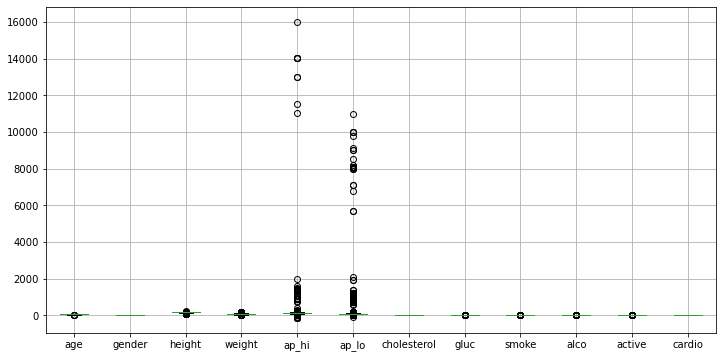

In [9]:
plt.figure(figsize=(12,6))
df.boxplot()
print()

In [10]:
#Os outliers serão identificados e tratados pelo método IQR score
# Q1 = Primeiro quartil
# Q3 = Terceiro quartil

# Q1 é o tempo associado à primeira probabilidade de sobrevivência na tabela menor que ou igual a 0,75.
# Q3 é o tempo associado à primeira probabilidade de sobrevivência na tabela menor que ou igual a 0,25.

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
IQR

age            10.0
gender          1.0
height         11.0
weight         18.0
ap_hi          20.0
ap_lo          10.0
cholesterol     1.0
gluc            0.0
smoke           0.0
alco            0.0
active          0.0
cardio          1.0
dtype: float64

In [11]:
#São 71 outliers
IQR.sum()

72.0

* Importante observar que as features binárias (aqueles só tem 1 e 0 como opções), como smoke (se é fumante ou não), alco (se bebe bebidas alcoólicas ou não) e active (se pratica exercícios físicos ou não), não é necessário passar pelo crivo do tratamento de outliers, porque em nenhuma delas há valores outliers, como mostra a tabela acima.


* Gender (gênero), cholesterol (nível de colesterol), gluc (nível de glicose) e cardio (possui ou não alguma doença cardíaca) também não são necessários, pelo menos nesse momento. 


* Os outilers das variáveis que realmente interessam, que são:
    * height         11.0
    * weight         18.0
    * ap_hi          20.0
    * ap_lo          10.0

In [12]:
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print(lower_limit)
print('\n')
print(upper_limit)

age             34.0
gender          -0.5
height         142.5
weight          38.0
ap_hi           90.0
ap_lo           65.0
cholesterol     -0.5
gluc             1.0
smoke            0.0
alco             0.0
active           1.0
cardio          -1.5
dtype: float64


age             74.0
gender           3.5
height         186.5
weight         110.0
ap_hi          170.0
ap_lo          105.0
cholesterol      3.5
gluc             1.0
smoke            0.0
alco             0.0
active           1.0
cardio           2.5
dtype: float64


In [13]:
#Removendo outliers de height e weight
df = df[(df['height']<210) & (df['weight']>38.0)]
df.shape

(66382, 12)

In [14]:
# Removendo outliers em ap_hi and ap_lo
df= df[(df['ap_lo']<360) & (df['ap_hi']<360)].copy()
df= df[(df['ap_lo']>20) & (df['ap_hi']>20)].copy()
df=df[df['ap_hi']>df['ap_lo']]
df.shape

(65065, 12)

In [15]:
df = df[(df['age']>30)]
df.shape

(65061, 12)

In [16]:
#Removendo pesos e alturas abaixo de 2,5% ou acima de 97,5% de uma determinada faixa.
df.drop(df[(df['height'] > df['height'].quantile(0.975)) | (df['height'] < df['height'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['weight'] > df['weight'].quantile(0.975)) | (df['weight'] < df['weight'].quantile(0.025))].index,inplace=True)
df.shape

(59250, 12)

#### Correlação entre os dados

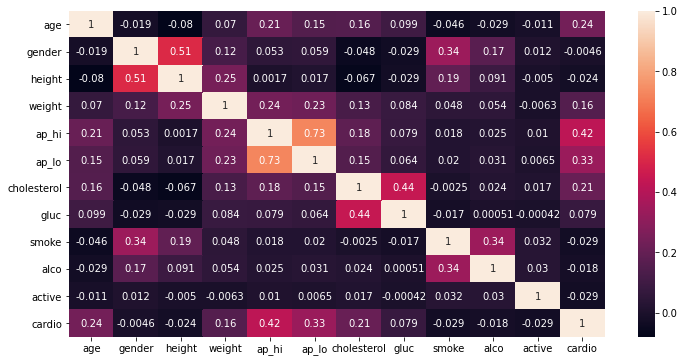

In [17]:
# Gráfico de correlação
plt.figure(figsize=(12,6))
df_corr = df.corr()
sns.heatmap(df_corr, annot = True)
print()

In [18]:
#Correlações com a variável alco(target)
correlations = df.corr()['cardio'].drop('cardio')
correlations.sort_values()

smoke         -0.028864
active        -0.028538
height        -0.024408
alco          -0.018212
gender        -0.004606
gluc           0.078839
weight         0.159917
cholesterol    0.210342
age            0.236914
ap_lo          0.334084
ap_hi          0.423659
Name: cardio, dtype: float64

* Analisando o heatmap e a tabela, é possível ver que há algumas correlações interessantes entre:
    * height (altura) e gender (gênero)
    * gluc (glicose) e cholesterol (colesterol)
    * ap_hi (pressão sistólica) e ap_lo (pressião diastólica)
    * smoke (fumar) e gender (gênero)
    * ap_hi (pressão sistólica) e cardio (se possui ou não doença vascular, a nossa variável alvo)
    * ap_lo (pressão diastólica) e cardio (se possui ou não doença vascular, a nossa variável alvo)
    
  
* Seria interessante fazer algumas análises mais profundas correlacionando essas features

In [19]:
#Antes de começar a fazer a levantar hipóteses, seria interessante montar um dicionário, 
#com o intuito de identificar melhor algumas features.

df['cholesterol']=df['cholesterol'].map({ 1: 'normal', 2: 'above normal', 3: 'well above normal'})
df['gluc']=df['gluc'].map({ 1: 'normal', 2: 'above normal', 3: 'well above normal'})
df['gender']=df['gender'].map({ 1: 'M', 2: 'F'})
df['smoke']=df['smoke'].map({ 0: 'No', 1: 'Yes'})
df['alco']=df['alco'].map({ 0: 'No', 1: 'Yes'})
df['active']=df['active'].map({ 0: 'No', 1: 'Yes'})

df.head()
df.shape

(59250, 12)

## Hipóteses

* Visão geral dos pacientes
* Qual gênero aparece mais dataset
* Qual gênero é mais propenso a contrair doenças cardíacas
* Relação age/cardio
* Analisar as correlações apresentadas no heatmap

#### Visão geral dos pacientes

In [20]:
#Média de idade dos pacientes
df.age.mean()

54.19545991561181

In [21]:
#Quantos são fumantes e não fumantes
(df.smoke.value_counts()/df.smoke.value_counts().sum())*100

No     90.906329
Yes     9.093671
Name: smoke, dtype: float64

In [22]:
#Quantos bebem e não bebem
(df.alco.value_counts()/df.alco.value_counts().sum())*100

No     94.447257
Yes     5.552743
Name: alco, dtype: float64

In [23]:
#Quantos praticam atividade física e não
(df.active.value_counts()/df.active.value_counts().sum())*100

Yes    79.691139
No     20.308861
Name: active, dtype: float64

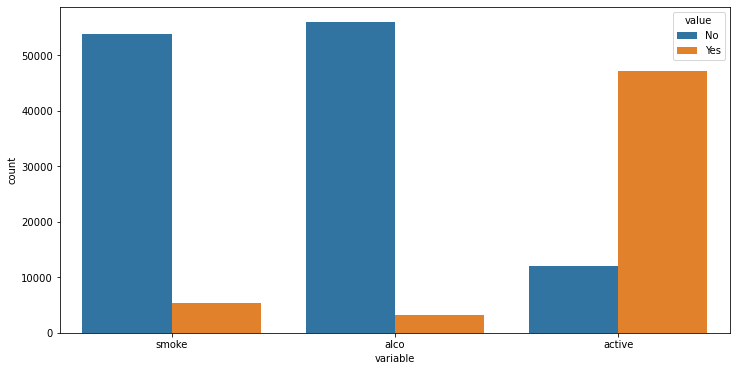

In [24]:
plt.figure(figsize=(12,6))
analise2 = df.loc[:,['smoke', 'alco', 'active']]
sns.countplot(x="variable", hue="value",data= pd.melt(analise2));

In [25]:
#Total de pessoas por doença cardíaca
total_cardio = df.cardio.value_counts()
total_cardio

1    30085
0    29165
Name: cardio, dtype: int64

In [26]:
(df.cardio.value_counts()/df.cardio.value_counts().sum())*100

1    50.776371
0    49.223629
Name: cardio, dtype: float64

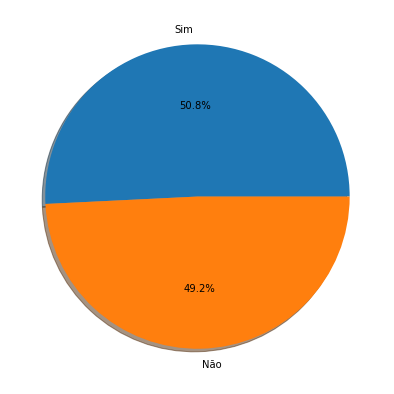

In [27]:
plt.figure(figsize=(7,7))
plt.pie(total_cardio, labels=['Sim', 'Não'], autopct='%1.1f%%', shadow=True);

* Um pequeno resumo do dataset mostra que:

    * A média de idade dos pacientes é de 54.1 anos
    * A maioria dos pacientes não fuma (90.7%)
    * A maioria não ingere bebidas alcoólicas (94.3%)
    * A maioria pratica exercícios físicos (79.7%)
    * Entretanto, a maioria apresentou alguma doença cardíaca (50.8%)

#### Gênero dos pacientes

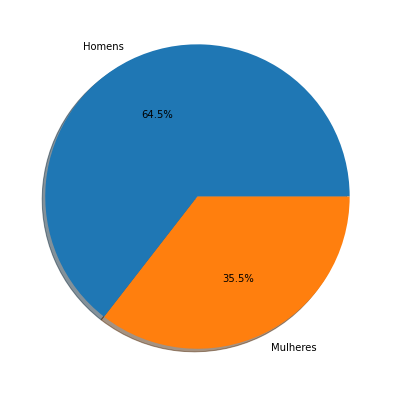

In [28]:
h_m = df.gender.value_counts()            #Homens e mulheres
total_hm = df.gender.value_counts().sum() #Total de homens e mulheres
porcentagem = h_m/total_hm                #Porcentagem
#Plotando o gráfico em pizza
plt.figure(figsize=(7,7))
plt.pie(porcentagem, labels=['Homens', 'Mulheres'], autopct='%1.1f%%', shadow=True);

* Os homens são os pacientes que mais aparecem no dataset. Correspondem a 64.4% dos pacientes, enquanto as mulheres correspondem a 35.6% dos pacientes.

#### Gênero por doenças cardíacas

In [29]:
#0 - Não possui doenças cardíacas / 1 - Possui doenças cardíacas
cardio_gender = df.groupby('cardio').gender.value_counts()
(cardio_gender/cardio_gender.sum()*100)

cardio  gender
0       M         31.640506
        F         17.583122
1       M         32.862447
        F         17.913924
Name: gender, dtype: float64

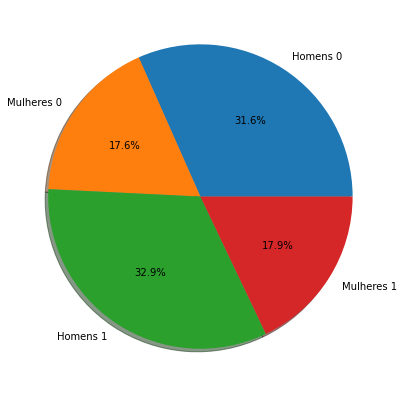

In [30]:
plt.figure(figsize=(7,7))
plt.pie(cardio_gender, labels=['Homens 0', 'Mulheres 0', 'Homens 1', 'Mulheres 1'], autopct='%1.1f%%', shadow=True);

* No dataset, os homens são a maioria dos pacientes com doenças cardíacas (32,7%).

#### Relação age/cardio

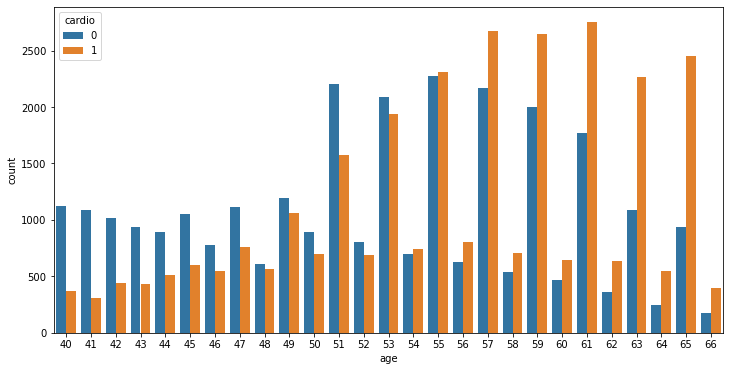

In [31]:
plt.figure(figsize=(12,6))
df['years'] = (df['age']).round().astype('int')
sns.countplot(x='age', hue='cardio', data = df, palette="tab10");

* Considerando (0 : Não | 1 : Sim), o gráfico acima mostra que pessoas a partir dos 51 anos começam a apresentar problemas relacionados à doenças cardíacas.

## Analisando as questões levantadas no Heatmap

* height (altura) e gender (gênero)
* gluc (glicose) e cholesterol (colesterol)
* ap_hi (pressão sistólica) e ap_lo (pressião diastólica)
* height (peso) e ap_hi (pressão diastólica)
* smoke (fumar) e gender (gênero)
* height (altura) e weight (peso)
* ap_hi (pressão sistólica) e cardio (se possui ou não doença vascular, a nossa variável alvo)
* ap_lo (pressão diastólica) e cardio (se possui ou não doença vascular, a nossa variável alvo)

#### Relação entre height (altura) e gender (gênero)

In [32]:
# Média de altura por gênero
df.groupby('gender').height.mean()

gender
F    169.288323
M    161.859857
Name: height, dtype: float64

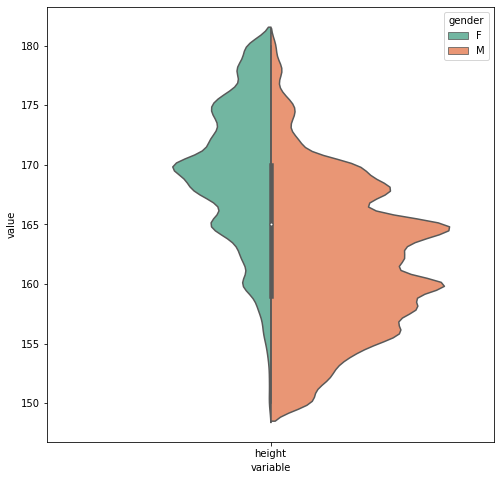

In [33]:
warnings.filterwarnings("ignore")
df_melt = pd.melt(frame=df, value_vars=['height'], id_vars=['gender'])
plt.figure(figsize=(8, 8))
ax = sns.violinplot(
    x='variable', 
    y='value', 
    hue='gender', 
    split=True, 
    data=df_melt, 
    scale='count',
    scale_hue=False,
    palette="Set2");

* Percebe-se que as mulheres são mais altas do que os homens nesse dataset. A relação entre height e gender (0.51) mostra que, em média, as mulheres são mais altas que os homens no dataset.

#### Relação entre gluc (glicose) e cholesterol (colesterol)

In [34]:
#Quantidade de pacientes por nível de glicose
(df.gluc.value_counts()/df.gluc.value_counts().sum())*100

normal               84.486076
well above normal     7.890295
above normal          7.623629
Name: gluc, dtype: float64

In [35]:
#Quantidade de pacientes por nível de colesterol
(df.cholesterol.value_counts()/df.cholesterol.value_counts().sum())*100

normal               74.123207
above normal         14.067511
well above normal    11.809283
Name: cholesterol, dtype: float64

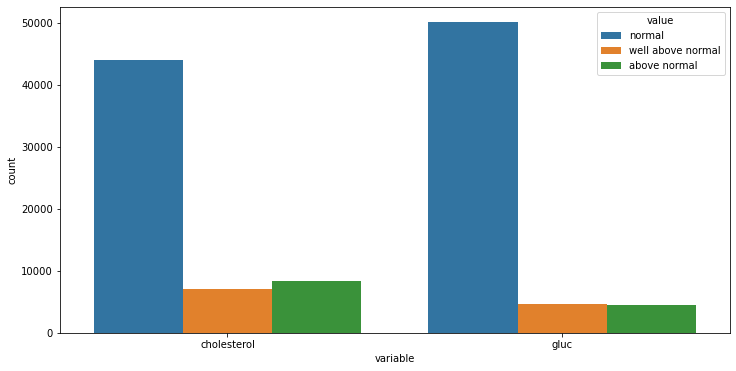

In [36]:
plt.figure(figsize=(12,6))
analise1 = df.loc[:,['cholesterol','gluc']]
sns.countplot(x="variable", hue="value",data= pd.melt(analise1));

* A taxa de glicose da maioria dos pacientes é normal (84.5%)
* A taxa de colesterol da maioria dos pacientes é normal (74.1%)

#### Relação entre ap_lo (diastólica) e ap_hi (sistólica)

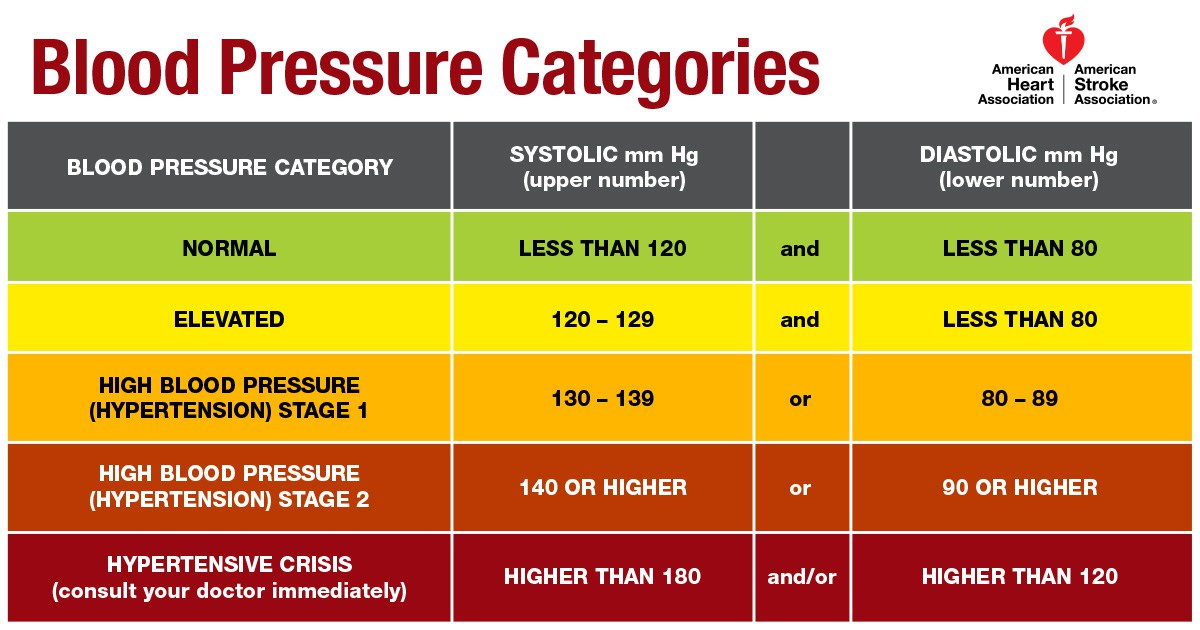

In [37]:
from IPython.display import Image
Image("BloodPressure.jpg")

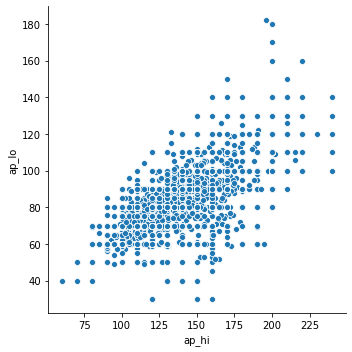

In [38]:
sns.relplot(x="ap_hi", y="ap_lo", data=df);

* Baseado na imagem acima, o normal de uma pessoa saudável é estar com a pressão sistólica abaixo de 120 mmHg e diastólica abaixo de 80 mmHg. No gráfico, é possível ver que a maioria dos pacientes está com a pressão arterial um pouco acima do normal, com pressão sistólica entre 120 e 150 mmHg e pressão diastólica entre 70 e 90 mmHg. 


* Em raros casos, há pessoas com casos de hipertensão, com pressão sistólica acima de 180 mmHg e pressão diastólica acima de 120 mmHg.

#### Relação entre as variáveis smoke (fumar) e gender (gênero)

In [39]:
df.smoke.value_counts()

No     53862
Yes     5388
Name: smoke, dtype: int64

In [40]:
df.groupby('smoke').gender.value_counts()

smoke  gender
No     M         37520
       F         16342
Yes    F          4690
       M           698
Name: gender, dtype: int64

In [41]:
(df.groupby('smoke').gender.value_counts()/df.groupby('smoke').gender.value_counts().sum())*100

smoke  gender
No     M         63.324895
       F         27.581435
Yes    F          7.915612
       M          1.178059
Name: gender, dtype: float64

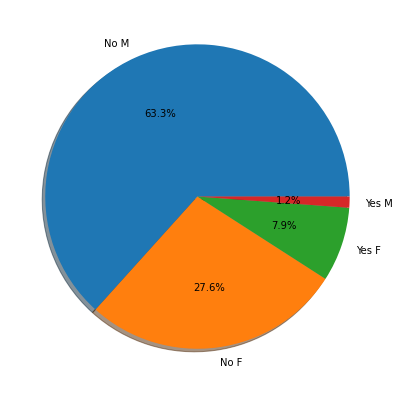

In [42]:
pizza_fumantes = df.groupby('smoke').gender.value_counts()
plt.figure(figsize=(7,7))
plt.pie(pizza_fumantes, labels=['No M', 'No F', 'Yes F', 'Yes M'], autopct='%1.1f%%', shadow=True);

* De 59250 pacientes, 5388 fumam, e dos que fumam, 4690 são mulheres e 698 são homens. Ou seja, a maioria dos pacientes não fumam.

#### Relação entre ap_hi (pressão sistólica) e cardio (se possui ou não doença vascular, a nossa variável alvo)

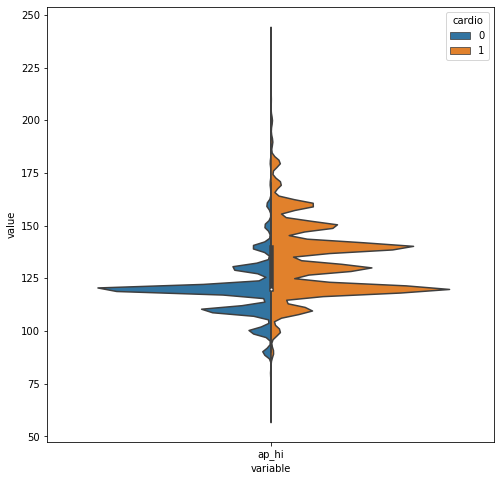

In [43]:
warnings.filterwarnings("ignore")
df_melt = pd.melt(frame=df, value_vars=['ap_hi'], id_vars=['cardio'])
plt.figure(figsize=(8, 8))
ax = sns.violinplot(
    x='variable', 
    y='value', 
    hue='cardio', 
    split=True, 
    data=df_melt, 
    scale='count',
    scale_hue=False,
    palette="tab10");

* O gráfico mostra que, as pessoas com algum problema cardíaco (Laranja), costumam apresentar pressão arterial sistólica maior e com mais frequência do que pessoas que não possuem problemas cardíacos (Azul). Muitas vezes, essas pessoas apresentam pressão arterial sistólica acima de 125 mmHg.

#### Relação entre ap_lo (pressão diastólica) e cardio (se possui ou não doença vascular, a nossa variável alvo)

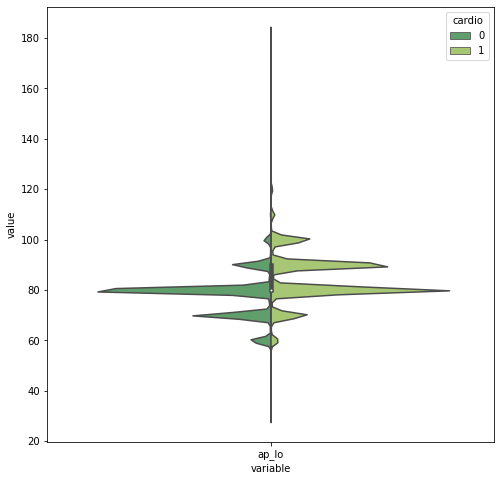

In [44]:
warnings.filterwarnings("ignore")
df_melt = pd.melt(frame=df, value_vars=['ap_lo'], id_vars=['cardio'])
plt.figure(figsize=(8, 8))
ax = sns.violinplot(
    x='variable', 
    y='value', 
    hue='cardio', 
    split=True, 
    data=df_melt, 
    scale='count',
    scale_hue=False,
    palette="summer");

* O gráfico mostra que, as pessoas com algum problema cardíaco (Verde claro), costumam apresentar pressão arterial diastólica maior e com mais frequência do que pessoas que não possuem problemas cardíacos (Verde escuro), com pressão arterial diastólica acima de 80 mmHg.

#### Uma última análise

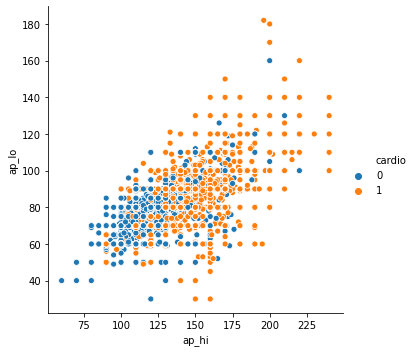

In [45]:
sns.relplot(x="ap_hi", y="ap_lo", hue='cardio', data=df);

* Achei interessante plotar este gráfico por último. Ele mostra que os pacientes que não têm nenhum problema cardíaco (azul) estão em sua maioria com pressão arterial acima de 120 mmHg em ap_hi (sistólica) por 80 mmHg em ap_lo (diastólica), considerada normal.

* Já os pacientes que possuem algum problema cardíaco (laranja) aparecem algumas vezes com pressão 120x80 mmHg, o que mostra que ter uma pressão arterial normal não é uma certeza de que a pessoa não sofrerá de algum problema cardíaco.

#### Salvando o dataframe sem outliers

In [46]:
#Salvando o dataframe em .csv
df.to_csv('df_clean.csv')

## Conclusão

* Quais conclusões podem ser tiradas do dataset?

    * A maioria dos pacientes leva vidas saudáveis. A maioria não fuma, não bebe, pratica exercícios físicos e possui a glicose e colesterol em bons níveis. Porém, a pressão sanguínea de muitos pacientes com algum problema cardíaco está acima do tolerável, o que pode ter feito com que a maioria dos pacientes possuam algum problema cardíaco no dataset.
    
    * O dataset não mostra se o paciente tem histórico de familiares com problemas cardíacos, o que pode influenciar nos diagnósticos.
    
    * Os homens são a maioria dos pacientes com doenças cardíacas (32,7%) e também são os mais saudáveis (31.7%).
    
    * Pessoas a partir dos 51 anos começam a apresentar problemas relacionados à doenças cardíacas.
    
    * As mulheres são mais altas do que os homens nesse dataset, mas isso não influenciou em nada nas análises.
    
    
* Agora poderão ser aplicadas as técnicas de machine learning para responder as perguntas iniciais.